In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('data/small_feature_vectors.csv')
labels = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   #id                                                 15 non-null     object 
 1   average_sentence_length_in_token                    15 non-null     float64
 2   average_characters_per_word                         15 non-null     float64
 3   average_syllables_per_word                          15 non-null     float64
 4   text_length_in_token                                15 non-null     int64  
 5   average_number_of_noun_phrases_per_sentence         15 non-null     float64
 6   average_heights                                     15 non-null     float64
 7   average_number_of_subordinate_clauses_per_sentence  15 non-null     float64
 8   average_count_of_sentences_with_verb_as_root        15 non-null     float64
 9   a

In [4]:
df['label'] = labels.tolist()

In [5]:
df

,#id,average_sentence_length_in_token,average_characters_per_word,average_syllables_per_word,text_length_in_token,average_number_of_noun_phrases_per_sentence,average_heights,average_number_of_subordinate_clauses_per_sentence,average_count_of_sentences_with_verb_as_root,average_count_of_sentences_with_nouns_as_root,...,POS_tag_proportion_for_adpositions,ttr,lexical_complexity_score,average_number_of_verbs_in_sentence,average_count_of_pronouns_per_sentence,average_count_of_definite_articles_per_sentence,average_semantic_similarity_of_all_nouns,average_semantic_similarity_of_all_verbs,average_semantic_similarity_of_all_adjectives,label
0,miniklexi_0,7.285714,4.862745,1.627451,102,2.214286,3.857143,0.071429,0.357143,0.000000,...,0.137255,0.683168,7.406711,1.285714,0.642857,0.142857,0.164365,0.339265,0.329539,0.0
1,miniklexi_1,8.090909,4.494382,1.539326,89,2.454545,4.363636,0.000000,0.363636,0.090909,...,0.146067,0.590909,7.652426,0.909091,0.090909,1.454545,0.207224,0.405196,0.241409,0.0
2,miniklexi_2,7.187500,4.521739,1.634783,115,2.750000,3.500000,0.312500,0.687500,0.062500,...,0.113043,0.517544,8.269501,0.875000,0.375000,1.312500,0.257176,0.401604,0.011698,0.0
3,miniklexi_3,7.200000,5.000000,1.743056,144,2.000000,3.850000,0.150000,0.350000,0.000000,...,0.090278,0.531469,7.802380,1.000000,0.600000,0.600000,0.249245,0.449268,0.249822,0.0
4,miniklexi_4,6.235294,5.132075,1.877358,106,2.176471,3.470588,0.117647,0.470588,0.000000,...,0.122642,0.704762,7.951559,0.882353,0.529412,0.647059,0.161453,0.386161,0.202404,0.0
5,klexikon_0,10.041667,4.850622,1.597510,241,3.083333,4.375000,0.500000,0.541667,0.041667,...,0.116183,0.535270,8.310472,1.583333,1.291667,0.625000,0.198214,0.306355,0.296186,0.5
6,klexikon_1,9.034483,4.809160,1.614504,262,2.827586,4.379310,0.275862,0.379310,0.137931,...,0.148855,0.519084,8.322164,1.275862,0.586207,1.310345,0.163882,0.351095,0.192055,0.5
7,klexikon_2,9.386364,4.932203,1.726392,413,3.272727,4.250000,0.500000,0.545455,0.022727,...,0.099274,0.414044,8.674772,1.318182,0.818182,1.181818,0.239647,0.403226,0.240596,0.5
8,klexikon_3,8.918367,5.345538,1.846682,437,2.734694,4.244898,0.142857,0.469388,0.081633,...,0.102975,0.487414,8.464846,1.244898,0.489796,0.918367,0.140432,0.379566,0.156105,0.5
9,klexikon_4,9.952381,5.550239,2.040670,418,3.404762,4.523810,0.595238,0.452381,0.047619,...,0.090909,0.447368,8.742675,1.380952,0.928571,1.452381,0.091701,0.401625,0.209678,0.5


In [6]:
data = df.drop(["#id","label"],  axis='columns')
data

,average_sentence_length_in_token,average_characters_per_word,average_syllables_per_word,text_length_in_token,average_number_of_noun_phrases_per_sentence,average_heights,average_number_of_subordinate_clauses_per_sentence,average_count_of_sentences_with_verb_as_root,average_count_of_sentences_with_nouns_as_root,POS_tag_proportion_for_verbs,...,POS_tag_proportion_for_numerales,POS_tag_proportion_for_adpositions,ttr,lexical_complexity_score,average_number_of_verbs_in_sentence,average_count_of_pronouns_per_sentence,average_count_of_definite_articles_per_sentence,average_semantic_similarity_of_all_nouns,average_semantic_similarity_of_all_verbs,average_semantic_similarity_of_all_adjectives
0,7.285714,4.862745,1.627451,102,2.214286,3.857143,0.071429,0.357143,0.000000,0.176471,...,0.176471,0.137255,0.683168,7.406711,1.285714,0.642857,0.142857,0.164365,0.339265,0.329539
1,8.090909,4.494382,1.539326,89,2.454545,4.363636,0.000000,0.363636,0.090909,0.112360,...,0.157303,0.146067,0.590909,7.652426,0.909091,0.090909,1.454545,0.207224,0.405196,0.241409
2,7.187500,4.521739,1.634783,115,2.750000,3.500000,0.312500,0.687500,0.062500,0.121739,...,0.208696,0.113043,0.517544,8.269501,0.875000,0.375000,1.312500,0.257176,0.401604,0.011698
3,7.200000,5.000000,1.743056,144,2.000000,3.850000,0.150000,0.350000,0.000000,0.138889,...,0.208333,0.090278,0.531469,7.802380,1.000000,0.600000,0.600000,0.249245,0.449268,0.249822
4,6.235294,5.132075,1.877358,106,2.176471,3.470588,0.117647,0.470588,0.000000,0.141509,...,0.188679,0.122642,0.704762,7.951559,0.882353,0.529412,0.647059,0.161453,0.386161,0.202404
5,10.041667,4.850622,1.597510,241,3.083333,4.375000,0.500000,0.541667,0.041667,0.157676,...,0.161826,0.116183,0.535270,8.310472,1.583333,1.291667,0.625000,0.198214,0.306355,0.296186
6,9.034483,4.809160,1.614504,262,2.827586,4.379310,0.275862,0.379310,0.137931,0.141221,...,0.160305,0.148855,0.519084,8.322164,1.275862,0.586207,1.310345,0.163882,0.351095,0.192055
7,9.386364,4.932203,1.726392,413,3.272727,4.250000,0.500000,0.545455,0.022727,0.140436,...,0.196126,0.099274,0.414044,8.674772,1.318182,0.818182,1.181818,0.239647,0.403226,0.240596
8,8.918367,5.345538,1.846682,437,2.734694,4.244898,0.142857,0.469388,0.081633,0.139588,...,0.183066,0.102975,0.487414,8.464846,1.244898,0.489796,0.918367,0.140432,0.379566,0.156105
9,9.952381,5.550239,2.040670,418,3.404762,4.523810,0.595238,0.452381,0.047619,0.138756,...,0.227273,0.090909,0.447368,8.742675,1.380952,0.928571,1.452381,0.091701,0.401625,0.209678


In [7]:
column_names = list(df.columns.values)
column_names

['#id',
 'average_sentence_length_in_token',
 'average_characters_per_word',
 'average_syllables_per_word',
 'text_length_in_token',
 'average_number_of_noun_phrases_per_sentence',
 'average_heights',
 'average_number_of_subordinate_clauses_per_sentence',
 'average_count_of_sentences_with_verb_as_root',
 'average_count_of_sentences_with_nouns_as_root',
 'POS_tag_proportion_for_verbs',
 'POS_tag_proportion_for_aux_verbs',
 'POS_tag_proportion_for_nouns',
 'POS_tag_proportion_for_adjectives',
 'POS_tag_proportion_for_punctuations',
 'POS_tag_proportion_for_determiners',
 'POS_tag_proportion_for_pronouns',
 'POS_tag_proportion_for_conjunctions',
 'POS_tag_proportion_for_numerales',
 'POS_tag_proportion_for_adpositions',
 'ttr',
 'lexical_complexity_score',
 'average_number_of_verbs_in_sentence',
 'average_count_of_pronouns_per_sentence',
 'average_count_of_definite_articles_per_sentence',
 'average_semantic_similarity_of_all_nouns',
 'average_semantic_similarity_of_all_verbs',
 'average_s

In [8]:
df.describe()

,average_sentence_length_in_token,average_characters_per_word,average_syllables_per_word,text_length_in_token,average_number_of_noun_phrases_per_sentence,average_heights,average_number_of_subordinate_clauses_per_sentence,average_count_of_sentences_with_verb_as_root,average_count_of_sentences_with_nouns_as_root,POS_tag_proportion_for_verbs,...,POS_tag_proportion_for_adpositions,ttr,lexical_complexity_score,average_number_of_verbs_in_sentence,average_count_of_pronouns_per_sentence,average_count_of_definite_articles_per_sentence,average_semantic_similarity_of_all_nouns,average_semantic_similarity_of_all_verbs,average_semantic_similarity_of_all_adjectives,label
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,10.805573,5.283053,1.867743,196.533333,3.446673,4.657613,0.524271,0.440869,0.037094,0.130345,...,0.118443,0.579479,8.419277,1.358247,0.670002,1.457424,0.183124,0.383319,0.207183,0.500000
std,4.062893,0.605742,0.273676,131.002108,1.347869,1.046949,0.482368,0.166676,0.043787,0.026870,...,0.022189,0.096117,0.584364,0.463593,0.399440,0.916060,0.066364,0.058020,0.072994,0.422577
min,6.235294,4.494382,1.539326,58.000000,2.000000,3.470588,0.000000,0.076923,0.000000,0.084906,...,0.083832,0.414044,7.406711,0.875000,0.090909,0.142857,0.062072,0.226184,0.011698,0.000000
25%,7.688311,4.856683,1.631117,98.000000,2.594619,4.051020,0.146428,0.357143,0.000000,0.117050,...,0.101125,0.518314,8.053065,1.071429,0.459183,0.782713,0.147924,0.365331,0.183210,0.000000
50%,9.386364,5.132075,1.834906,144.000000,3.076923,4.375000,0.500000,0.428571,0.022727,0.138889,...,0.116183,0.590909,8.322164,1.285714,0.586207,1.310345,0.164365,0.401625,0.207680,0.500000
75%,13.137362,5.583502,2.041293,251.500000,3.988096,4.972527,0.654762,0.506128,0.066964,0.141365,...,0.137593,0.660733,8.797351,1.482143,0.809091,1.727272,0.235810,0.417359,0.243247,1.000000
max,19.333333,6.482759,2.396552,437.000000,6.333333,7.333333,1.666667,0.800000,0.137931,0.176471,...,0.148936,0.724138,9.511999,2.666667,1.666667,3.200000,0.304084,0.449268,0.329539,1.000000


#id                                                    object
average_sentence_length_in_token                      float64
average_characters_per_word                           float64
average_syllables_per_word                            float64
text_length_in_token                                    int64
average_number_of_noun_phrases_per_sentence           float64
average_heights                                       float64
average_number_of_subordinate_clauses_per_sentence    float64
average_count_of_sentences_with_verb_as_root          float64
average_count_of_sentences_with_nouns_as_root         float64
POS_tag_proportion_for_verbs                          float64
POS_tag_proportion_for_aux_verbs                      float64
POS_tag_proportion_for_nouns                          float64
POS_tag_proportion_for_adjectives                     float64
POS_tag_proportion_for_punctuations                   float64
POS_tag_proportion_for_determiners                    float64
POS_tag_

array([[<AxesSubplot:title={'center':'average_sentence_length_in_token'}>,
        <AxesSubplot:title={'center':'average_characters_per_word'}>,
        <AxesSubplot:title={'center':'average_syllables_per_word'}>,
        <AxesSubplot:title={'center':'text_length_in_token'}>,
        <AxesSubplot:title={'center':'average_number_of_noun_phrases_per_sentence'}>],
       [<AxesSubplot:title={'center':'average_heights'}>,
        <AxesSubplot:title={'center':'average_number_of_subordinate_clauses_per_sentence'}>,
        <AxesSubplot:title={'center':'average_count_of_sentences_with_verb_as_root'}>,
        <AxesSubplot:title={'center':'average_count_of_sentences_with_nouns_as_root'}>,
        <AxesSubplot:title={'center':'POS_tag_proportion_for_verbs'}>],
       [<AxesSubplot:title={'center':'POS_tag_proportion_for_aux_verbs'}>,
        <AxesSubplot:title={'center':'POS_tag_proportion_for_nouns'}>,
        <AxesSubplot:title={'center':'POS_tag_proportion_for_adjectives'}>,
        <AxesSub

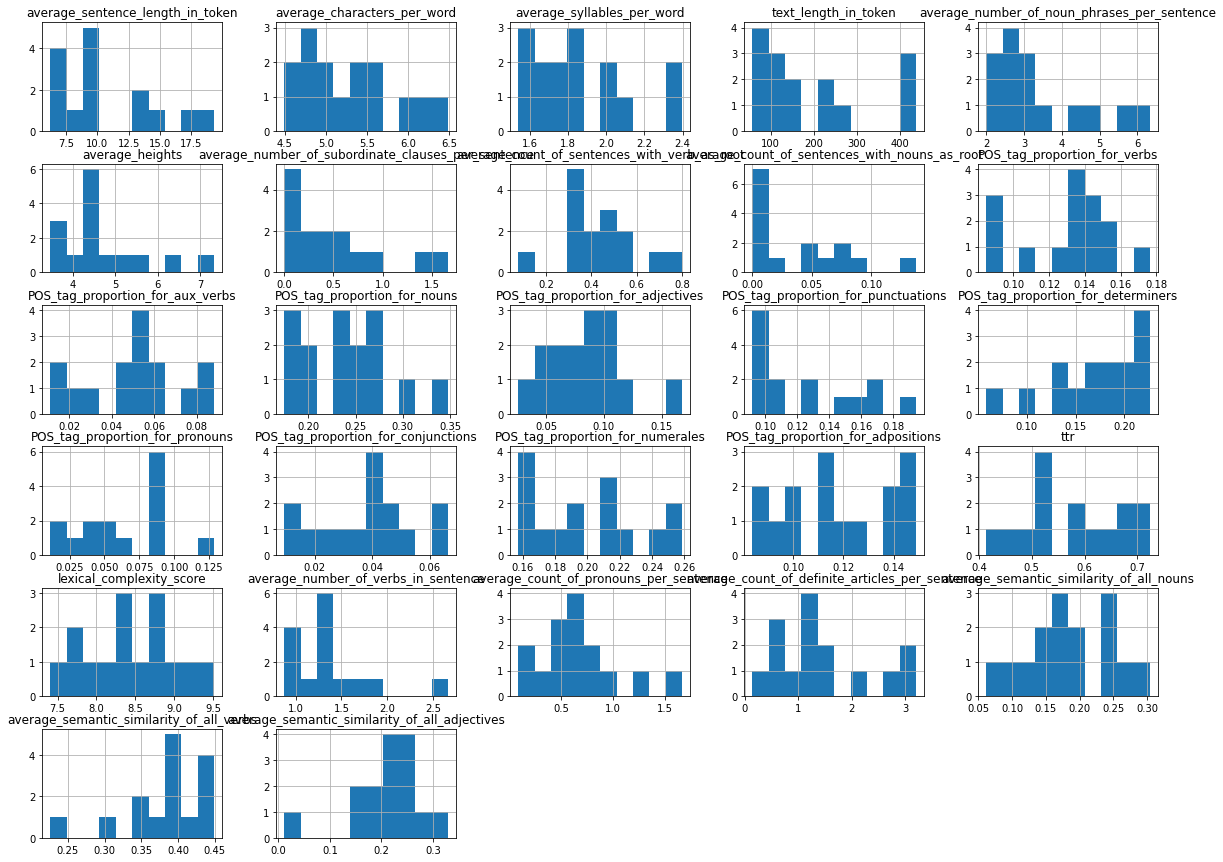

In [9]:
print (df.dtypes)
newdf = df.select_dtypes(include = ["float64", "int64"])
newdf = newdf.drop(["label"],axis=1)
newdf.hist(figsize=(20,15))

In [10]:
X, y = shuffle(data, labels, random_state=0)
X_train = np.array(X[0:10])
X_test = np.array(X[10:15])
y_train = np.array(y[0:10])
y_test = np.array(y[10:15])

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)
print(y_test)

[1.18158133 0.18117654 0.19306734 0.9175692  0.64108922]
[1.  0.  0.  0.5 1. ]


In [13]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.51239910e-01  4.01184709e-02 -3.63070661e-01  1.24814258e-04
 -3.14206452e-01 -2.16829862e-01 -2.33139751e-01 -1.49946759e-02
  3.33232426e-01  4.13425860e-02 -6.72987512e-02 -2.31047450e-01
 -6.03078627e-02 -1.30495068e-01 -5.62435316e-02  7.59256075e-02
 -8.39832059e-03 -1.67323736e-01  1.47782215e-01  1.98987929e-01
  3.14699467e-01  1.60157059e-02  3.77047291e-01 -8.10572761e-02
 -1.08782091e-01 -1.67867835e-01 -1.71166679e-02]
Mean squared error: 0.08
Coefficient of determination: 0.59


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
regress_model = RandomForestRegressor()
regress_model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
prediction_test = regress_model.predict(X_test)
prediction_train = regress_model.predict(X_train)

print("mean square error train: ", mean_squared_error(prediction_train, y_train))
print("mean square error test: ", mean_squared_error(prediction_test, y_test))

mean square error train:  0.010644999999999998
mean square error test:  0.08786


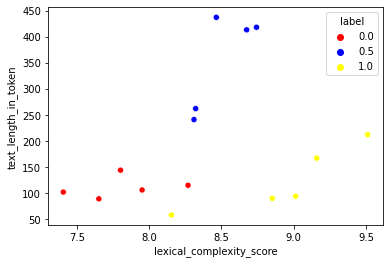

In [22]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import seaborn as sns
a = sns.scatterplot(data=df, hue="label", x="lexical_complexity_score", y="text_length_in_token", palette=["red", "blue", "yellow"])

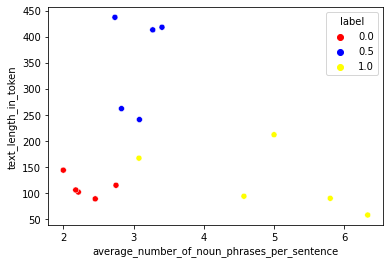

In [23]:
b = sns.scatterplot(data=df, hue="label", x="average_number_of_noun_phrases_per_sentence", y="text_length_in_token", palette=["red", "blue", "yellow"])

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
labels_int = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
X_train = np.array(X[0:10])
X_test = np.array(X[10:15])
y_train_int = np.array(labels_int[0:10])
y_test_int = np.array(labels_int[10:15])

clf_tree.fit(X_train, y_train_int)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
pred = clf_tree.predict(X_test)

error = []
counter = 0

for i in range(len(pred)):
    if pred[i] != y_test_int[i]:
        error.append(2)
        counter = counter + 1
    else:
        error.append(pred[i])

print("mismatch = ", counter)

mismatch =  5


<AxesSubplot:title={'center':'Feature Importances'}>

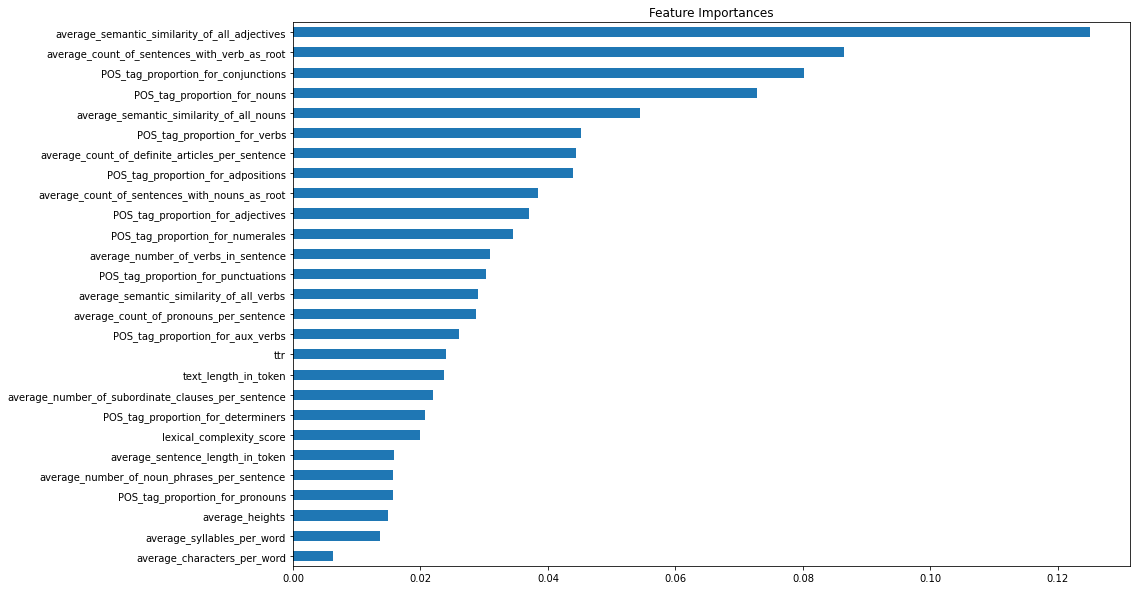

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, labels_int)

importances = model.feature_importances_
features = data.columns

feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values()
    
plt.figure(figsize=(15, 10)) 
plt.title('Feature Importances')
feat_importances.plot(kind='barh')